In [55]:


import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('Mall_Customers.csv')
data.head()



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
print(data.describe())

print(data.isnull().sum())

print(data.dtypes)

print(data['Genre'].value_counts())



       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
Ge

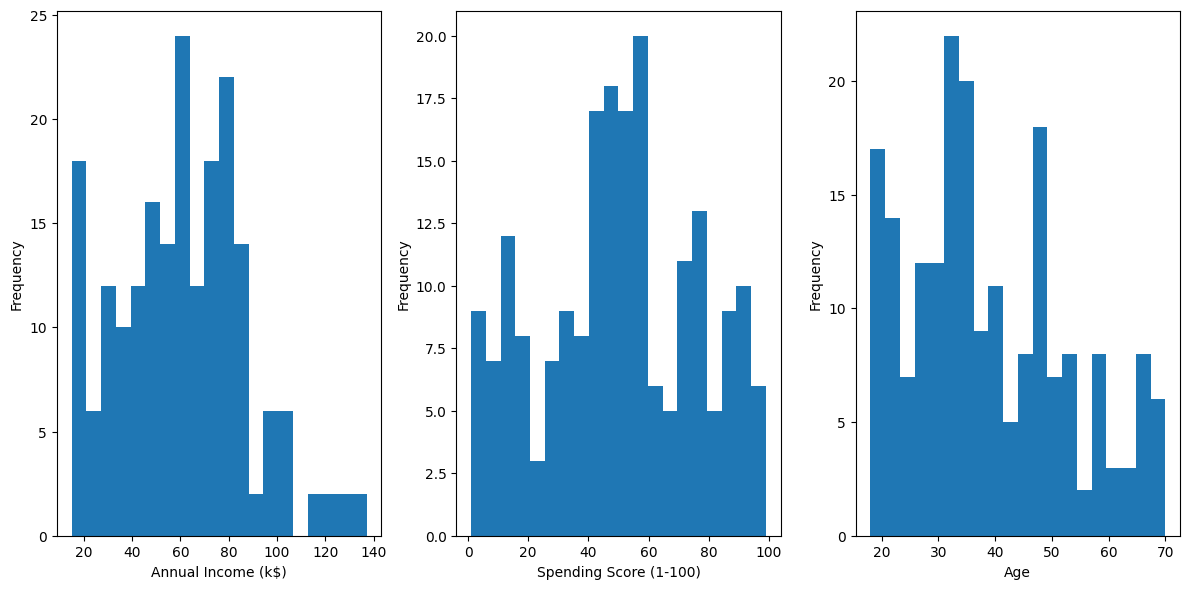

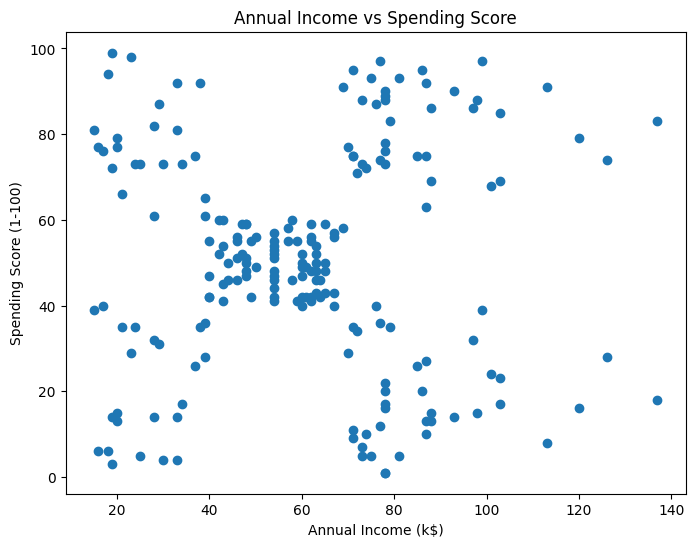

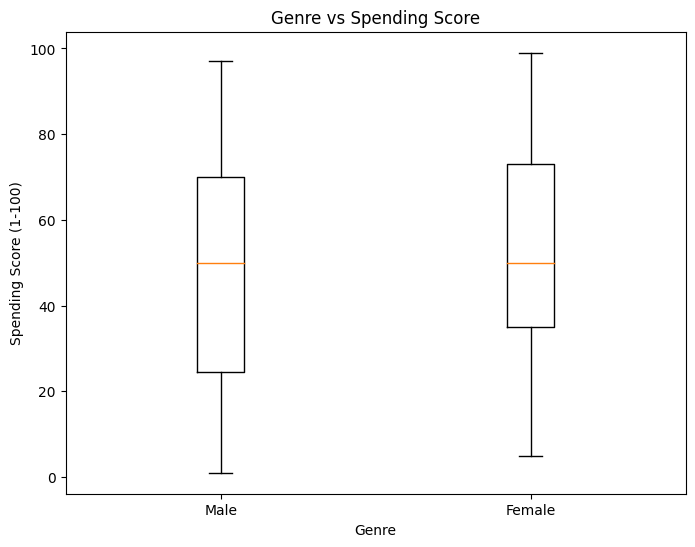

In [57]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(data['Annual Income (k$)'], bins=20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['Spending Score (1-100)'], bins=20)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot([data[data['Genre'] == 'Male']['Spending Score (1-100)'],
             data[data['Genre'] == 'Female']['Spending Score (1-100)']],
            labels=['Male', 'Female'])
plt.xlabel('Genre')
plt.ylabel('Spending Score (1-100)')
plt.title('Genre vs Spending Score')
plt.show()


In [58]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [59]:
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

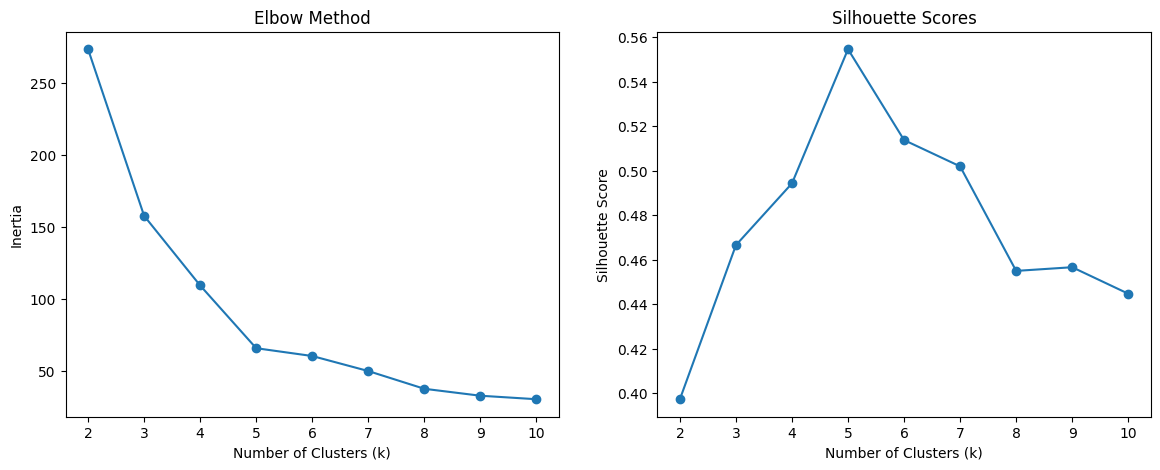

In [60]:
plt.figure(figsize=(14, 5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.show()

In [61]:

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_


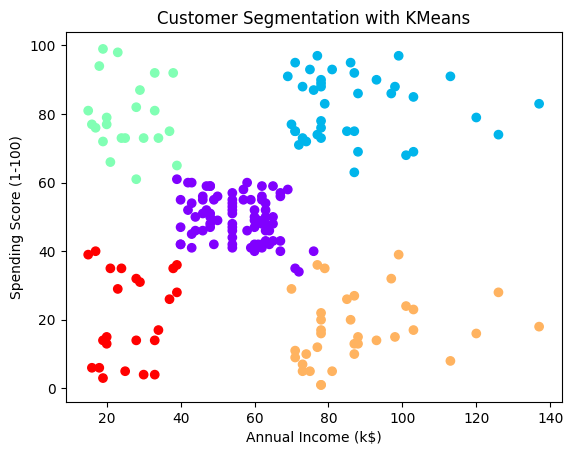

In [62]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=data['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation with KMeans')
plt.show()


In [63]:

for i in range(n_clusters):
  print(f"Cluster {i}:")
  print(data[data['Cluster'] == i].describe())

Cluster 0:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000           81.000000               81.000000   
mean    86.320988  42.716049           55.296296               49.518519   
std     24.240889  16.447822            8.988109                6.530909   
min     44.000000  18.000000           39.000000               34.000000   
25%     66.000000  27.000000           48.000000               44.000000   
50%     86.000000  46.000000           54.000000               50.000000   
75%    106.000000  54.000000           62.000000               55.000000   
max    143.000000  70.000000           76.000000               61.000000   

       Cluster  
count     81.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
Cluster 1:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   39.000000  39.000000           39.000000               3

In [64]:


from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn import metrics

silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
davies_bouldin_index = davies_bouldin_score(X_scaled, kmeans.labels_)


print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin_index)



Silhouette Score: 0.5546571631111091
Davies-Bouldin Index: 0.5722356162263352
